Region Growing Segmentation:

Region growing is a segmentation technique that iteratively groups pixels based on their similarity. It starts with seed points, which are pixels known to belong to a specific object. The algorithm then examines the neighboring pixels around the seed points and adds them to the same region if they meet a similarity criterion. This process continues until no more pixels can be added to the current region.

Here are the key factors influencing region growing:

•Seed Point Selection:Choosing appropriate seed points is crucial for successful segmentation. Seeds should be placed within each object you want to segment and should represent the object's characteristic intensity values.

•Similarity Criterion:The most common criterion is intensity difference. Pixels with intensity values within a certain threshold (similar brightness/darkness) of the seed point are considered similar and added to the region. Other criteria like color similarity or texture features can also be used.

•Neighborhood Configuration:The choice of neighboring pixels can affect the shape and smoothness of the segmented regions. Common configurations include 4-neighborhood (up, down, left, right) or 8-neighborhood (including diagonals).

In [ ]:
img = cv2.imread('images.jpeg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
ret

73.0

array([[ 3, 14,  4, ...,  1,  1,  1],
       [ 0, 13,  8, ...,  3,  3,  4],
       [ 0, 12, 14, ...,  2,  2,  2],
       ...,
       [24, 32,  8, ..., 18, 18, 18],
       [13, 35, 12, ..., 16, 16, 16],
       [ 7, 39, 17, ...,  8,  8,  8]], dtype=uint8)
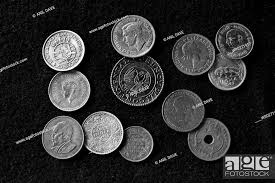

In [ ]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
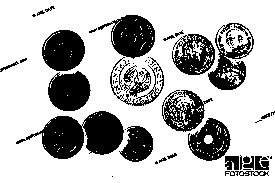

In [ ]:
thresh

(-0.5, 611.5, 316.5, -0.5)

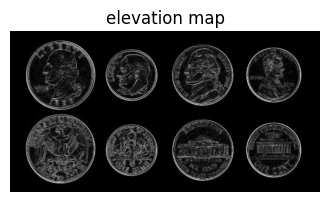

In [ ]:
from skimage.filters import sobel
coins = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

(-0.5, 611.5, 316.5, -0.5)

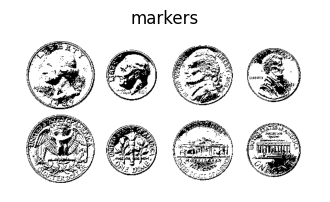

In [ ]:
markers = np.zeros_like(coins)
markers[coins < 50] = 1
markers[coins > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap="gray")
ax.set_title('markers')
ax.axis('off')

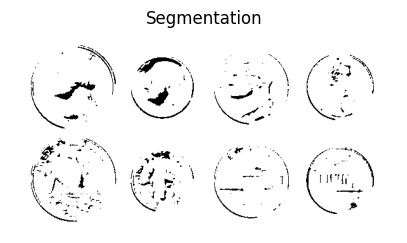

In [ ]:
from skimage import segmentation
import matplotlib.pyplot as plt
segmentation_coins = segmentation.watershed(elevation_map, markers)
segmentation_coins[segmentation_coins == -1] = 0
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(segmentation_coins,cmap="gray")
ax.set_title('Segmentation')
ax.axis('off')
plt.show()

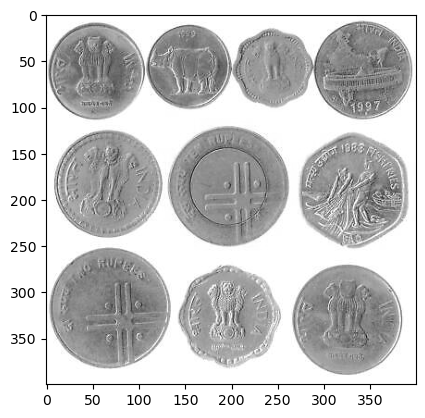

In [ ]:
plt.figure()
plt.imshow(coins)
plt.gray()

Text(0.5, 1.0, 'map elevation')

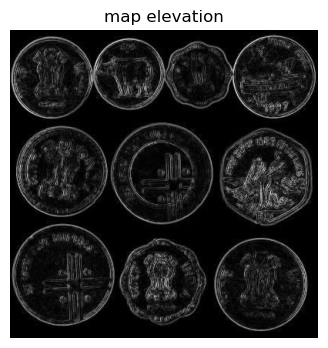

In [ ]:
from skimage.filters import sobel
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import canny
from scipy import ndimage as ndi

elmap = sobel(coins)
figure, axis = plt.subplots(figsize=(6, 4))
axis.imshow(elmap, cmap=plt.cm.gray)
axis.axis('off')
axis.set_title('map elevation')

In [ ]:
im=coins

SyntaxError: invalid syntax (1183302115.py, line 2)

<ipython-input-103-6a9c1f2ac109>:30: RuntimeWarning: overflow encountered in scalar subtract
  intensity_difference = abs(image[current] - image[neighbor])


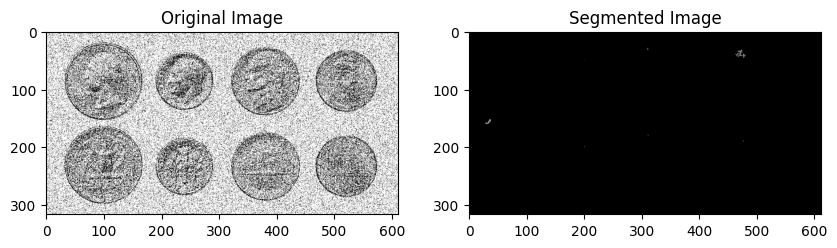

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def add_noise(image, mean=0, sigma=100):
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)

def region_growing(image, seeds, threshold):

  labels = np.zeros_like(image, dtype=np.uint8)
  label_counter = 1

  for seed in seeds:
    queue = [seed]
    current_label = label_counter
    label_counter += 1

    while queue:
      current = queue.pop(0)

      if labels[current] == 0:
        labels[current] = current_label
        neighbors = [(current[0] + 1, current[1]), (current[0] - 1, current[1]),
                     (current[0], current[1] + 1), (current[0], current[1] - 1)]

        for neighbor in neighbors:
          if 0 <= neighbor[0] < image.shape[0] and 0 <= neighbor[1] < image.shape[1]:
            intensity_difference = abs(image[current] - image[neighbor])
            if labels[neighbor] == 0 and intensity_difference <= threshold:
              queue.append(neighbor)

  return labels

def main():
  image = cv2.imread("coins.jpg", cv2.IMREAD_GRAYSCALE)

  seeds = [(20, 30), (50, 200), (30, 310), (40, 475), (160, 30), (200, 200), (180, 310), (190, 475)]  # Adjust coordinates for each coin

  threshold = 10
  image =add_noise(image)

  segmented_image = region_growing(image.copy(), seeds, threshold)


  plt.figure(figsize=(10, 5))
  plt.subplot(121), plt.imshow(image, cmap="gray"), plt.title("Original Image")
  plt.subplot(122), plt.imshow(segmented_image, cmap="gray"), plt.title("Segmented Image")
  plt.show()


if __name__ == "__main__":
  main()


<ipython-input-100-769773a19dcf>:25: RuntimeWarning: overflow encountered in scalar subtract
  intensity_difference = abs(image[current] - image[neighbor])


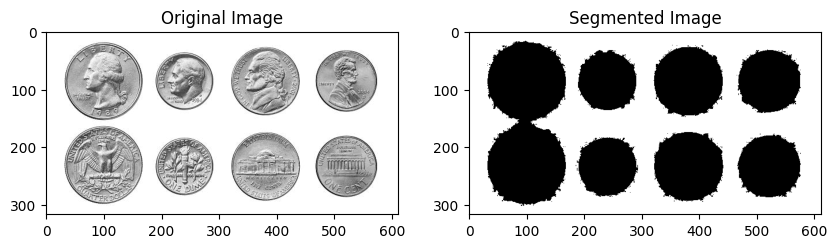

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def region_growing(image, seeds, threshold):
  labels = np.zeros_like(image, dtype=np.uint8)
  label_counter = 1
  for seed in seeds:
    queue = [seed]
    current_label = label_counter
    label_counter += 1
    while queue:
      current = queue.pop(0)
      if labels[current] == 0:
        labels[current] = current_label
        neighbors = [(current[0] + 1, current[1]), (current[0] - 1, current[1]),
                     (current[0], current[1] + 1), (current[0], current[1] - 1)]
        for neighbor in neighbors:
          if 0 <= neighbor[0] < image.shape[0] and 0 <= neighbor[1] < image.shape[1]:
            intensity_difference = abs(image[current] - image[neighbor])
            if labels[neighbor] == 0 and intensity_difference <= threshold:
              queue.append(neighbor)
  return labels
def main():
  image = cv2.imread("coins.jpg", cv2.IMREAD_GRAYSCALE)
  seeds = [(20, 30), (50, 200), (30, 310), (40, 475), (160, 30), (200, 200), (180, 310), (190, 475)]  # Adjust coordinates for each coin
  threshold = 10
  segmented_image = region_growing(image.copy(), seeds, threshold)
  plt.figure(figsize=(10, 5))
  plt.subplot(121), plt.imshow(image, cmap="gray"), plt.title("Original Image")
  plt.subplot(122), plt.imshow(segmented_image, cmap="gray"), plt.title("Segmented Image")
  plt.show()
if __name__ == "__main__":
  main()
